## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-10-08 20:30:38.587067: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-08 20:30:39.771855: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-08 20:30:40.131048: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-08 20:30:40.131805: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instruc

In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)
importlib.reload(data.data_load)


<module 'data.data_load' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_load.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 25.3%
RAM Usage: 15.0%
Available RAM: 1.3T
Total RAM: 1.5T
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 16
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 105)
X_pca shape: (455, 16)
X_pca_full shape: (455, 105)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: apzjxv9a
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/apzjxv9a
Initialized sweep with ID: apzjxv9a
2
3
4
BEST CONFIG {'input_dim': 210, 'expression_bins': 3, 'd_model': 128, 'nhead': 2, 'num_layers': 2, 'deep_hidden_dims': [256, 128], 'cls_init': 'random', 'pooling_mode': 'attention', 'use_alibi': False, 'transformer_dropout': 0.1, 'dropout_rate': 0.1, 'learning_rate': 3.5e-05, 'weight_decay': 1e-05, 'batch_size': 1024, 'epochs': 100, 'aug_prob': 0.0, 'aug_style': 'linear_decay', 'lambda_sym': 0.0, 'num_workers': 2, 'prefetch_factor': 4, 'cosine_lr': False}


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Loaded Gene2Vec embeddings: 102 genes with 200-dimensional embeddings
Gene overlap: 102/105 valid genes have Gene2Vec embeddings
Number of learnable parameters in CrossAttentionGene2Vec model: 495016
Number of genes after Gene2Vec intersection: 102
Expression bins: 3
CLS token initialization: random
Pooling mode: attention


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 1.29 GB
Best val loss so far at epoch 1: 0.0454
Best val loss so far at epoch 2: 0.0405
Best val loss so far at epoch 3: 0.0377
Best val loss so far at epoch 4: 0.0351
Best val loss so far at epoch 5: 0.0351
Epoch 5/100, Train Loss: 0.0773, Val Loss: 0.0351, Time: 1.03s
Best val loss so far at epoch 6: 0.0337
Best val loss so far at epoch 7: 0.0334
Best val loss so far at epoch 9: 0.0330
Best val loss so far at epoch 10: 0.0329
Epoch 10/100, Train Loss: 0.0630, Val Loss: 0.0329, Time: 1.06s
Best val loss so far at epoch 12: 0.0325
Best val loss so far at epoch 13: 0.0324
Best val loss so far at epoch 14: 0.0323
Best val loss so far at epoch 15: 0.0320
Epoch 15/100, Train Loss: 0.0541, Val Loss: 0.0320, Time: 1.08s
Best val loss so far at epoch 18: 0.0317
Epoch 20/100, Train Loss: 0.0474, Val Loss: 0.0318, Time: 1.04s
Best val loss so far at epoch 22: 0.0315
Best val loss so far at epoch 25: 0.0315
Epoch 25/100, Train L

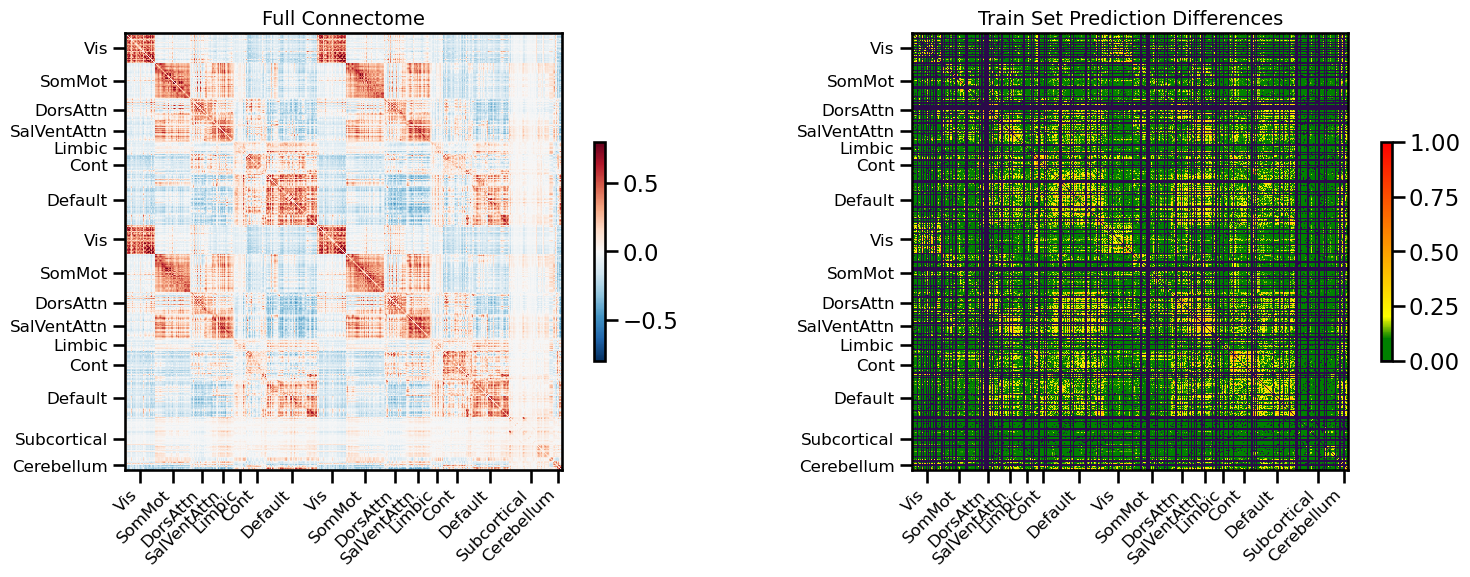

<Figure size 640x480 with 0 Axes>

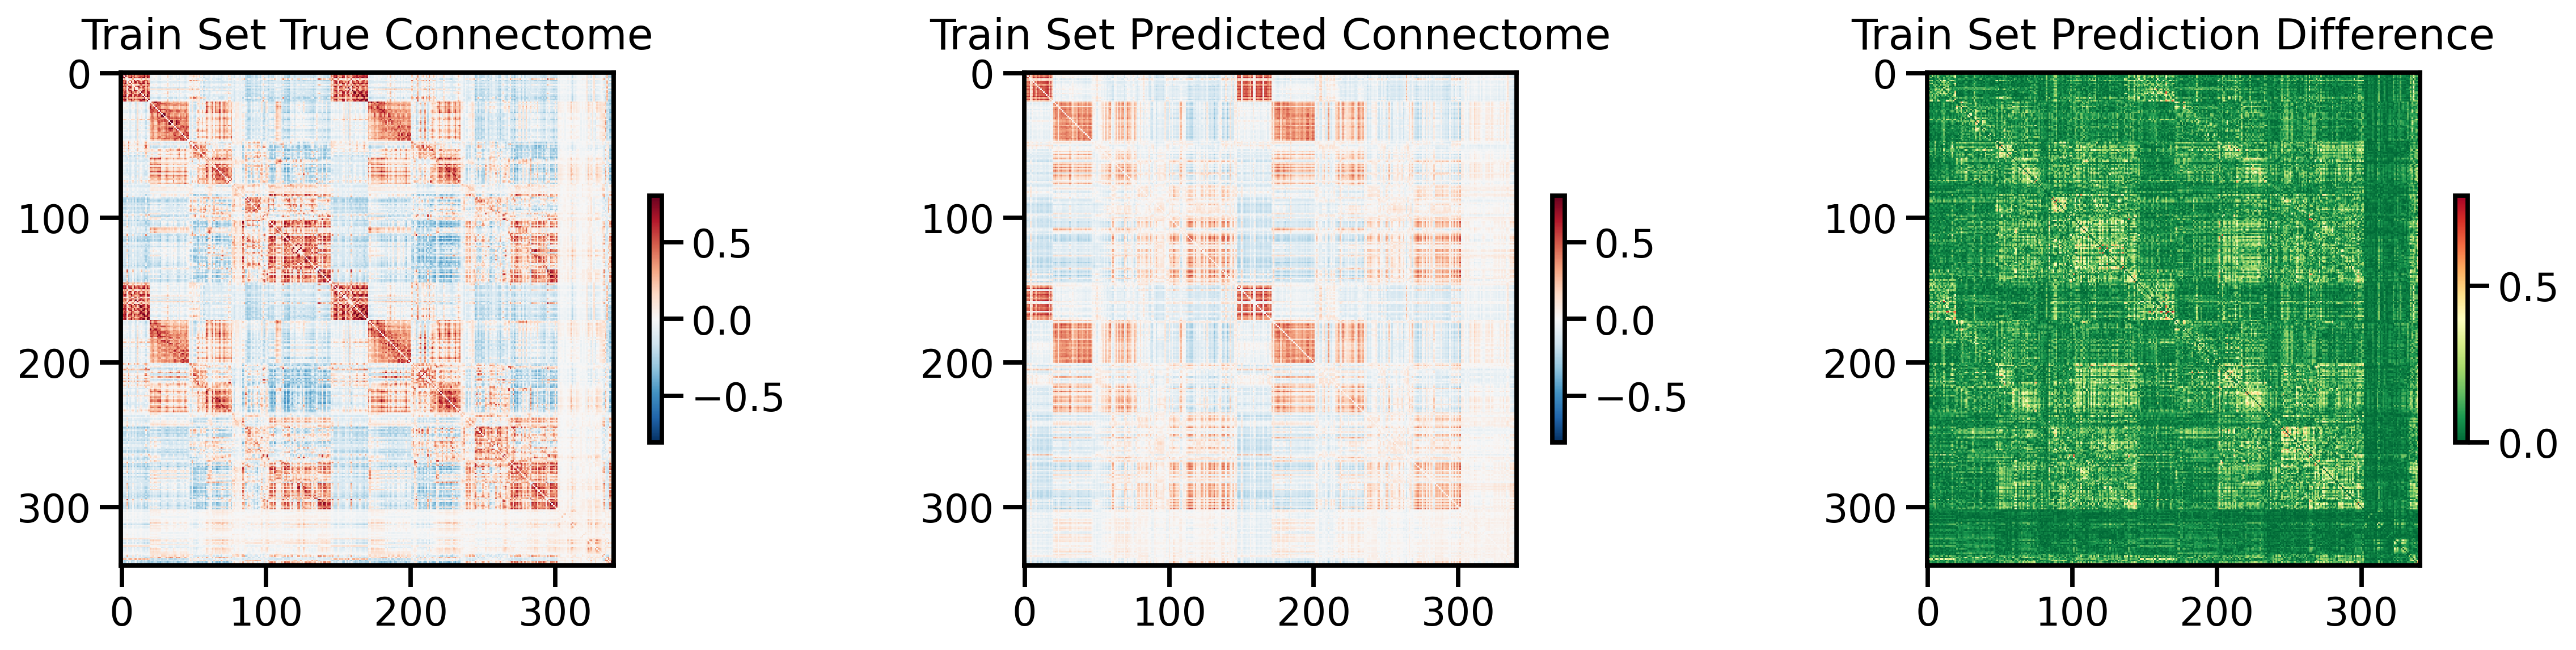

<Figure size 640x480 with 0 Axes>

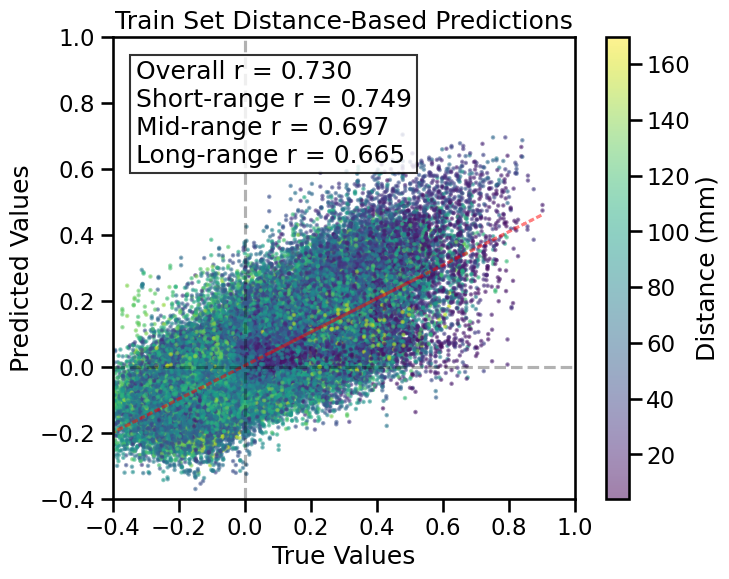

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

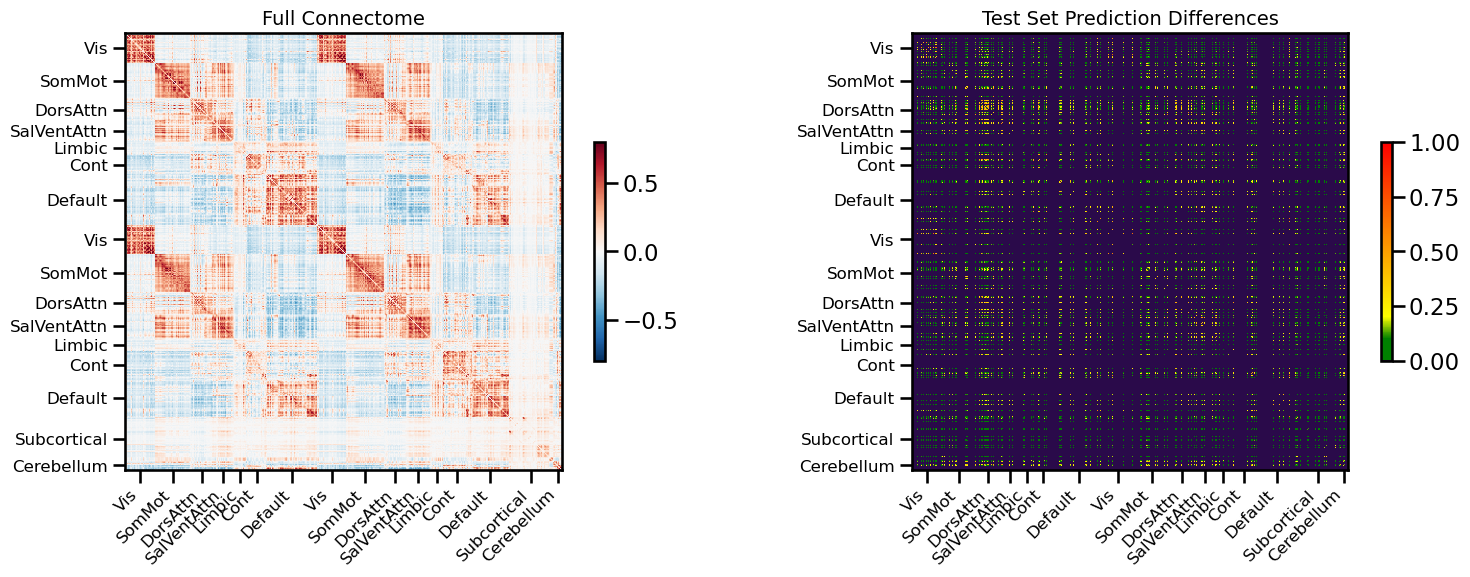

<Figure size 640x480 with 0 Axes>

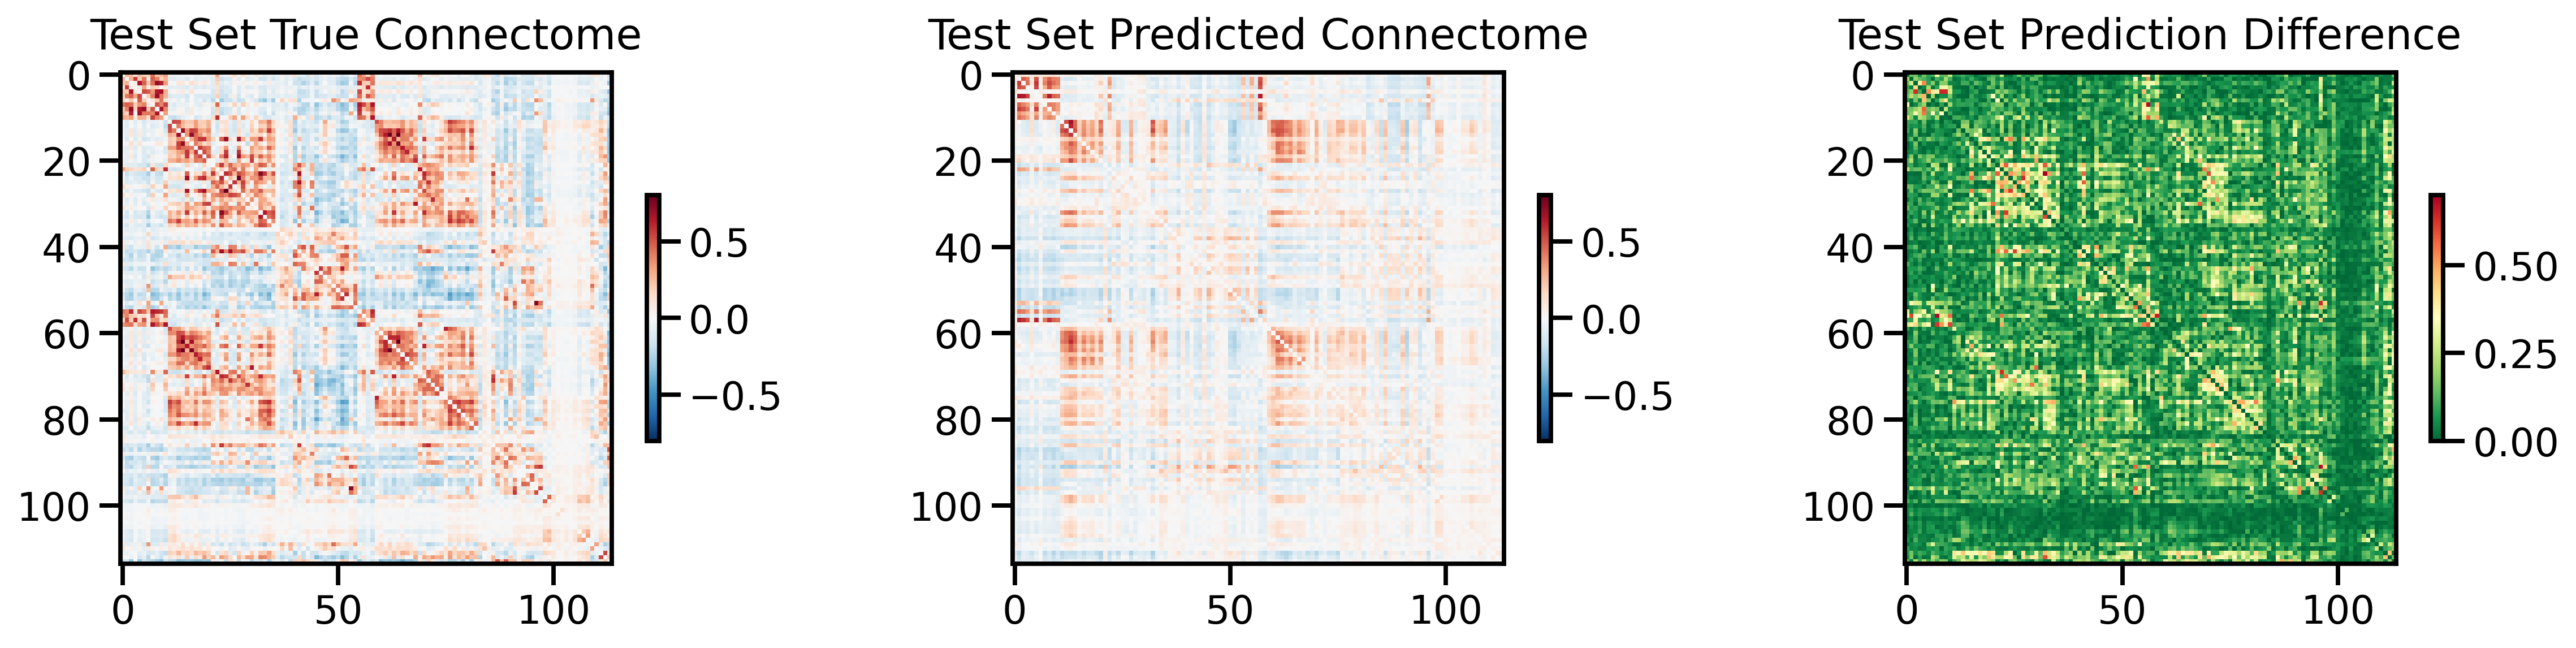

<Figure size 640x480 with 0 Axes>

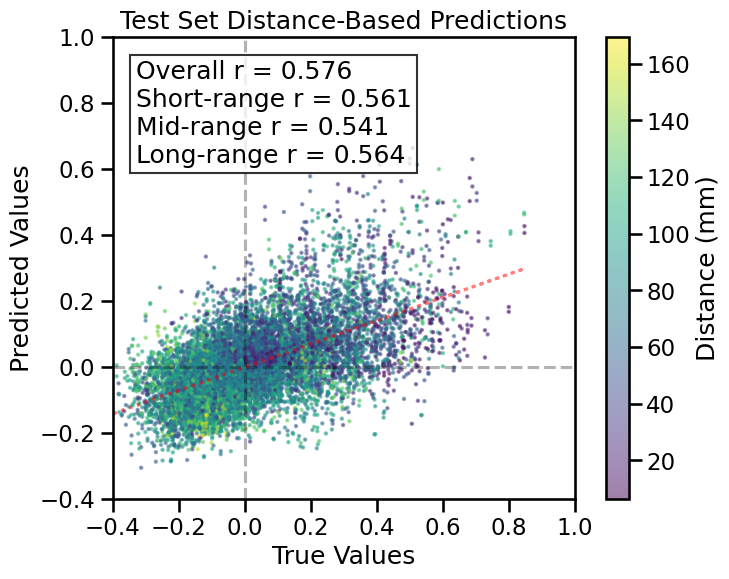

TRAIN METRICS
GLOBAL: mse=0.015888, mae=0.092104, r2=0.5310, pearson_r=0.7299, spearman_r=0.6859, geodesic_distance=30.4892
DISTANCE-BASED: short=0.7487, mid=0.6968, long=0.6653
HEMISPHERIC: left=0.7319, right=0.7274, inter=0.7362
CONNECTION STRENGTH: neg=0.1401, weak=0.6096, pos=0.3788
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.7849    0.7636
  Default       0.5536    0.7015
  SalVentAttn    0.7898    0.7756
  Limbic        0.7354    0.7632
  DorsAttn      0.8362    0.7963
  SomMot        0.8197    0.7927
  Vis           0.8298    0.7871
  Subcortical    0.6721    0.7179
  Cerebellum    0.6982    0.6915

TEST METRICS
GLOBAL: mse=0.022189, mae=0.108050, r2=0.3223, pearson_r=0.5756, spearman_r=0.5540, geodesic_distance=18.0869
DISTANCE-BASED: short=0.5611, mid=0.5406, long=0.5640
HEMISPHERIC: left=0.5637, right=0.5736, inter=0.5856
CONNECTION STRENGTH: neg=-0.1380, weak=0.4889, pos=0.2693
NETWORK CORRELATIONS:
  NETWORK      

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.


In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='richiardi2015',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='cross_attention_gene2vec',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()